
# Data Science Assignment

Title:Australian Weather 
Dataset:weatherAUS.csv

Name: Melwin Daniel
USN: 1NT16CS156

![title](aus.jpg)

In [2]:
#importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#Reading csv file
df2=pd.read_csv(r"C:\Users\Melwin Daniel\Desktop\weatherAUS.csv")
df=pd.DataFrame(df2)
col=list(df.columns.values)

In [4]:
#First 5 entries of the dataframe
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am      ...      Humidity3pm  \
0           W           44.0          W      ...             22.0   
1         WNW           44.0        NNW      ...             25.0   
2         WSW           46.0          W      ...             30.0   
3          NE           24.0         SE      ...             16.0   
4           W           41.0        ENE      ...             33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0     

In [3]:
pd.shape(df)

NameError: name 'pd' is not defined

In [5]:
# Removing non arithematic variables
for e in col:
    if e in ('Date','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','RISK_MM'):
        col.remove(e) #pop can be used
        df=df.drop(e,axis=1)
        

In [6]:
#list of the Location Column
loc=df['Location'].tolist()
# Removing  duplicates from the list
loc= list(dict.fromkeys(loc))

In [7]:
# Creating new dataframe with concised values
data=df.groupby(['Location']).agg({'MinTemp': np.min, 'MaxTemp': np.max,'Rainfall': np.mean,
'Evaporation': np.mean, 'Sunshine': np.mean,'WindGustSpeed': np.mean, 'WindSpeed9am': np.mean,
 'WindSpeed3pm': np.mean, 'Humidity9am': np.mean, 'Humidity3pm': np.mean, 'Pressure9am': np.mean,
 'Pressure3pm': np.mean, 'Cloud9am': np.mean,'Cloud3pm': np.mean, 'Temp9am': np.mean, 
 'Temp3pm': np.mean }).reset_index()
 
data=pd.DataFrame(data)

In [8]:
#first 5 grouped and aggregated values
print(data.head())

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       Adelaide      0.7     45.7  1.572185     5.824924  7.752002   
1         Albany      1.8     39.0  2.255073     4.207273  6.658765   
2         Albury     -2.8     44.8  1.925710          NaN       NaN   
3   AliceSprings     -5.2     44.9  0.869355     9.029929  9.581944   
4  BadgerysCreek     -3.0     46.4  2.207925          NaN       NaN   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0      36.530812      9.954295     15.470665    59.618476    44.820097   
1            NaN     12.498986     19.001305    74.820202    67.392487   
2      32.953016      8.221816     14.378828    74.108081    47.884935   
3      40.533714     14.728623     18.103665    39.625165    24.078321   
4      33.609890      8.047488     14.008262    76.893067    51.426648   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
0  1018.727579  1016.772202       NaN       NaN  16.9731

Text(0.5, 1.0, 'Rainfall')

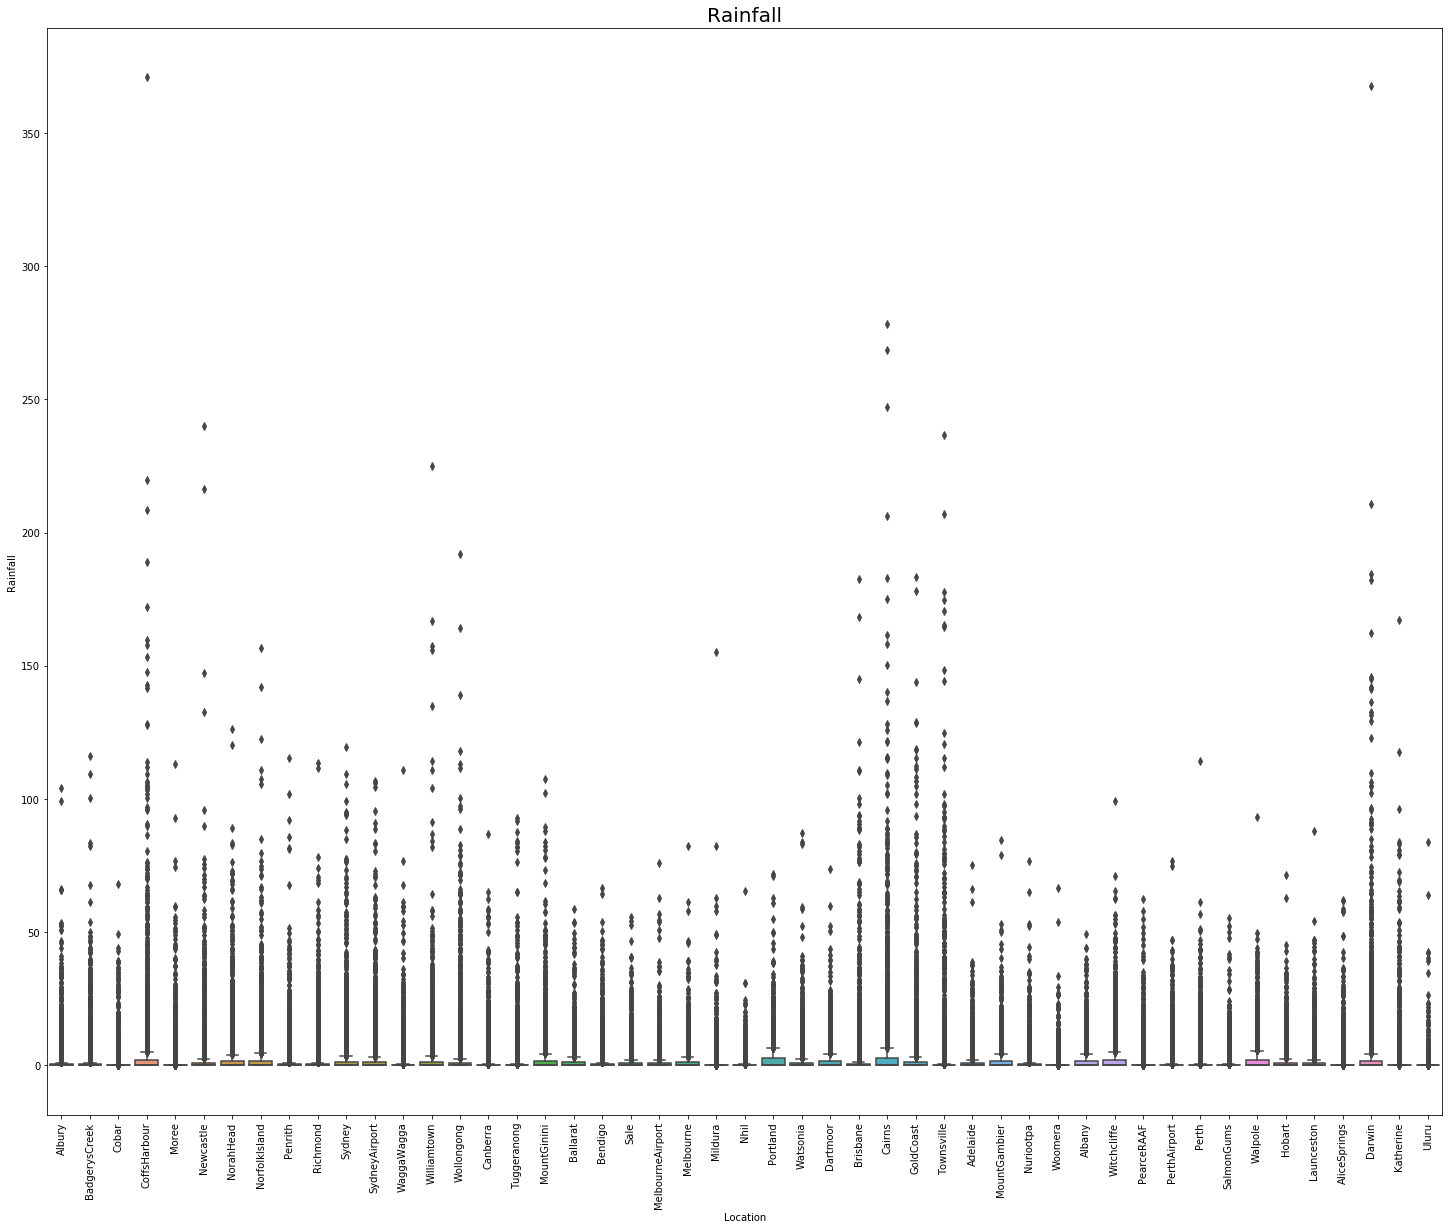

In [9]:
#Box Plot for Rainfall
plt.figure(figsize=(25,20))
plt.xticks(rotation=90)
sns.boxplot(x="Location", y='Rainfall', data=df).set_title(label="Rainfall", fontsize=20)

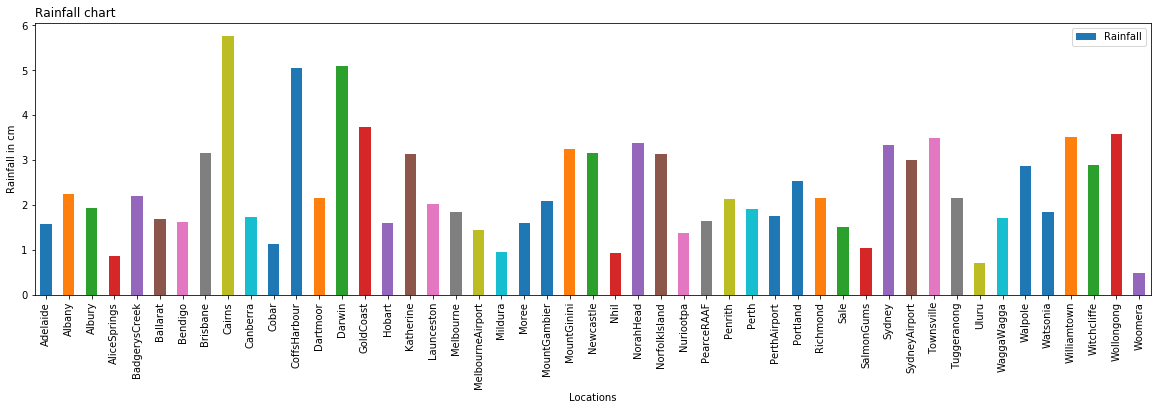

In [10]:
#Bar graph for rainfall
plt.figure(figsize=(20,5))
ax=plt.gca()
data.plot(kind='bar',x='Location',y='Rainfall',ax=ax)
ax.set_xticks(data.index)
ax.set_xticklabels(data.Location,rotation=90)
plt.title('Rainfall chart',loc='left')
plt.xlabel('Locations')
plt.ylabel('Rainfall in cm')
plt.show()

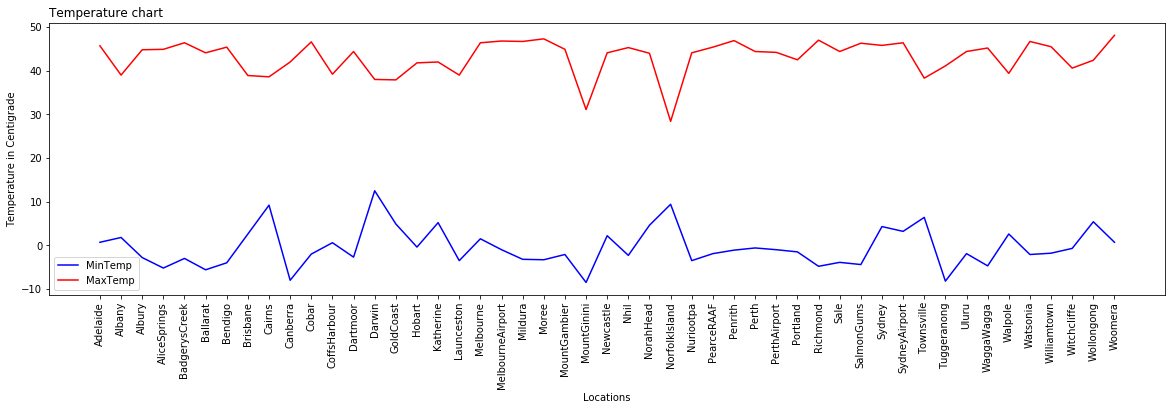

In [11]:
#Line graph for temperature
plt.figure(figsize=(20,5))
ax=plt.gca()
data.plot(kind='line',x='Location',y='MinTemp',color='blue',ax=ax)
data.plot(kind='line',x='Location',y='MaxTemp',color='red',ax=ax)
ax.set_xticks(data.index)
ax.set_xticklabels(data.Location,rotation=90)
plt.title('Temperature chart',loc='left')
plt.xlabel('Locations')
plt.ylabel('Temperature in Centigrade')
plt.show()

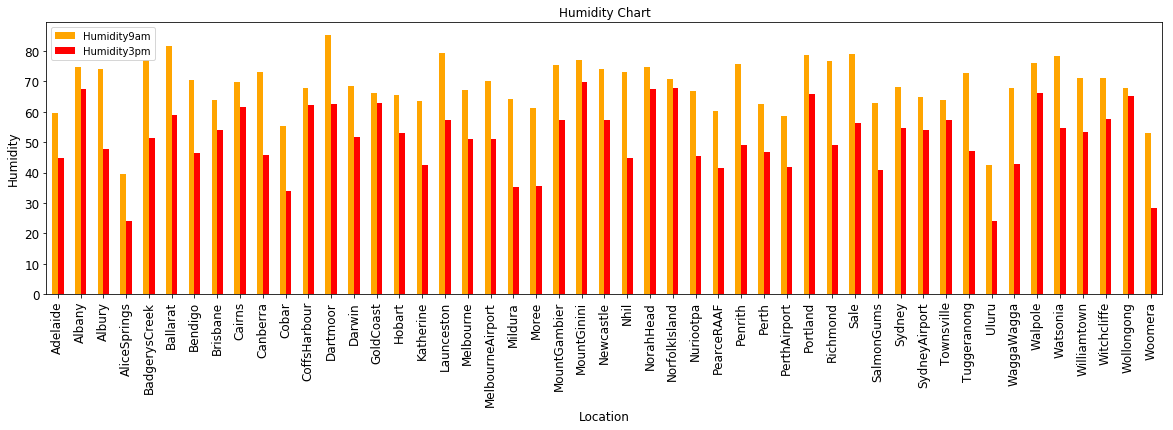

In [12]:
# Bar graph for humidity
ax = data[['Humidity9am','Humidity3pm']].plot(kind='bar', title ="Humidity Chart",color=['orange','red'],figsize=(20,5),legend=True, fontsize=12)
ax.set_ylabel("Humidity",fontsize=12)
ax.set_xlabel("Location",fontsize=12)
ax.set_xticks(data.index)
ax.set_xticklabels(data.Location,rotation=90)
plt.show()

In [13]:
# Normalizing the pressure values for more clarity
data['Pressure9am'] = data['Pressure9am']-data['Pressure9am'].mean() / data['Pressure9am'].max()-data['Pressure9am'].min()
data['Pressure3pm'] = data['Pressure3pm']-data['Pressure3pm'].mean() / data['Pressure3pm'].max()-data['Pressure3pm'].min()


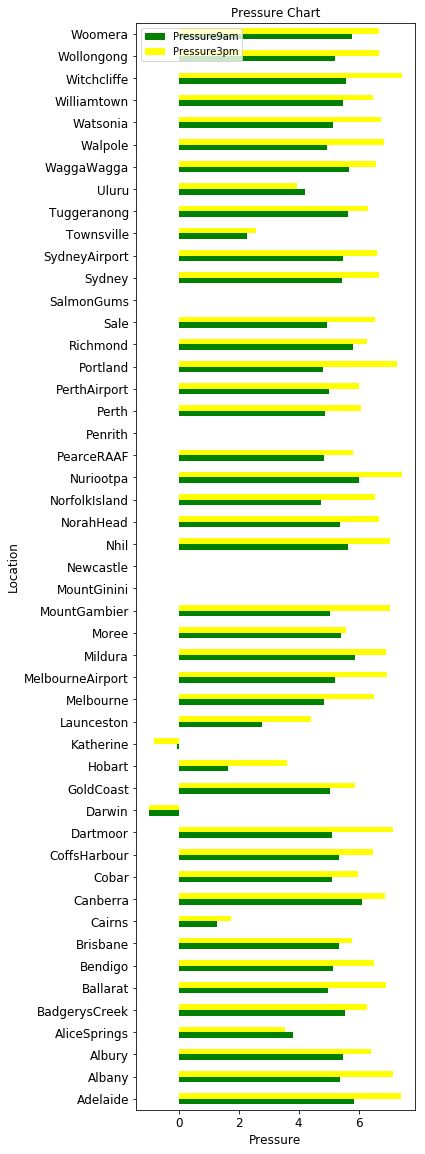

In [14]:
#Horizontalbar graph for pressure
data.fillna(0)
ax = data[['Pressure9am','Pressure3pm']].plot(kind='barh', title ="Pressure Chart",color=['green','yellow'],figsize=(5,20),legend=True, fontsize=12)
ax.set_xlabel("Pressure",fontsize=12)
ax.set_ylabel("Location",fontsize=12)
ax.set_yticks(data.index)
ax.set_yticklabels(data.Location)
plt.legend(loc='upper left')
plt.show()

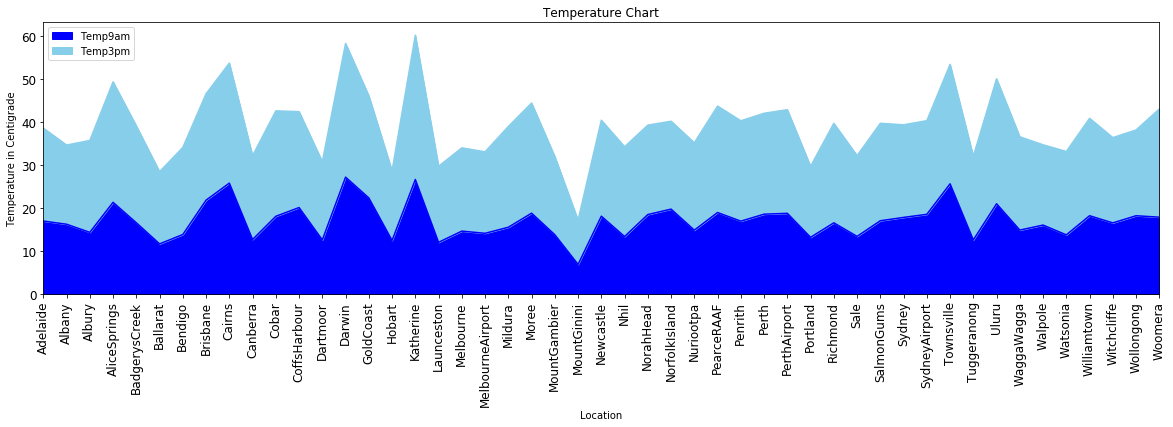

In [15]:
#Area graph for temperature
ax = data[['Temp9am','Temp3pm']].plot(kind='area', title ="Temperature Chart",color=['blue','skyblue'],stacked='true',figsize=(20,5),legend=True, fontsize=12)
ax.set_xlabel('Location')
ax.set_ylabel('Temperature in Centigrade')
ax.set_xticks(data.index)
ax.set_xticklabels(data.Location,rotation=90)
plt.legend(loc='upper left')
ax.margins(0, 0) # to avoid whitespace
plt.show()

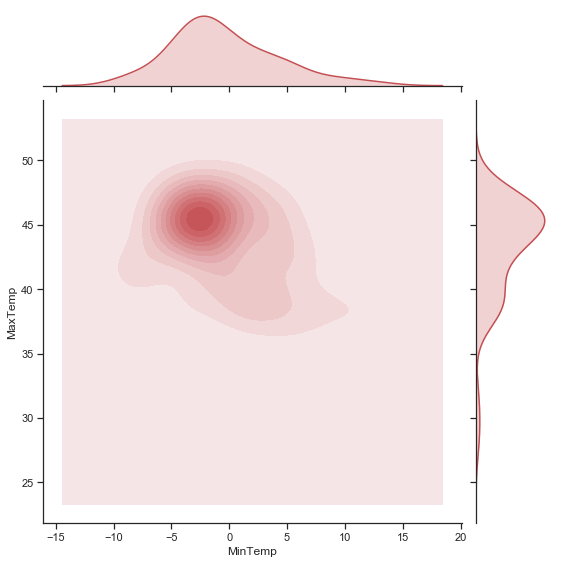

In [21]:
#Most extreme climate

sns.set(style='ticks', color_codes=True)
g = sns.JointGrid(x='MinTemp', y='MaxTemp',data=data, height=8)
#g = g.plot(sns.regplot, sns.distplot)
g = g.plot_joint(sns.kdeplot, color="r", shade=True)
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)

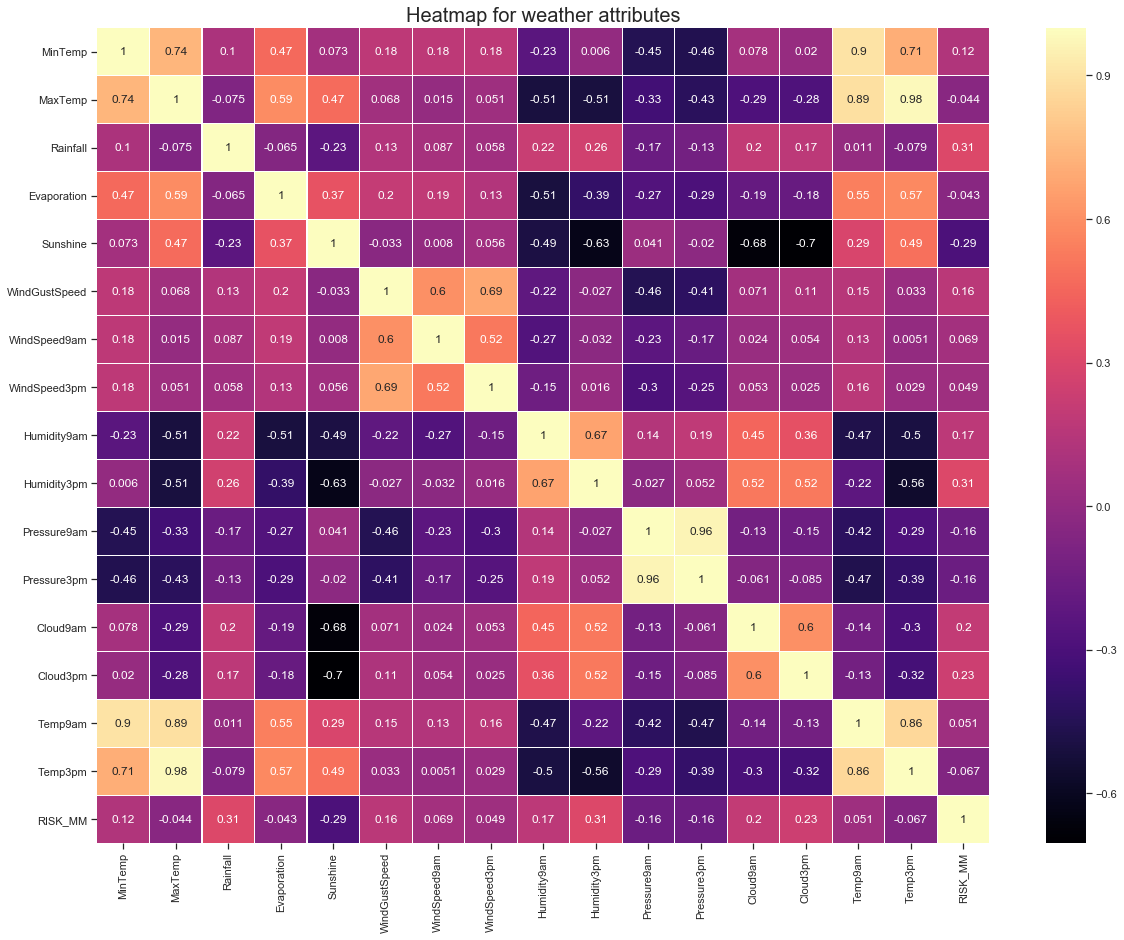

In [17]:
#Plotting the heat-map
plt.figure(figsize=(20,15))
heat_map = sns.heatmap(df[col].corr(),annot = True, linewidths=0.1, cmap='magma')
heat_map.set_title(label='Heatmap for weather attributes', fontsize=20)
heat_map

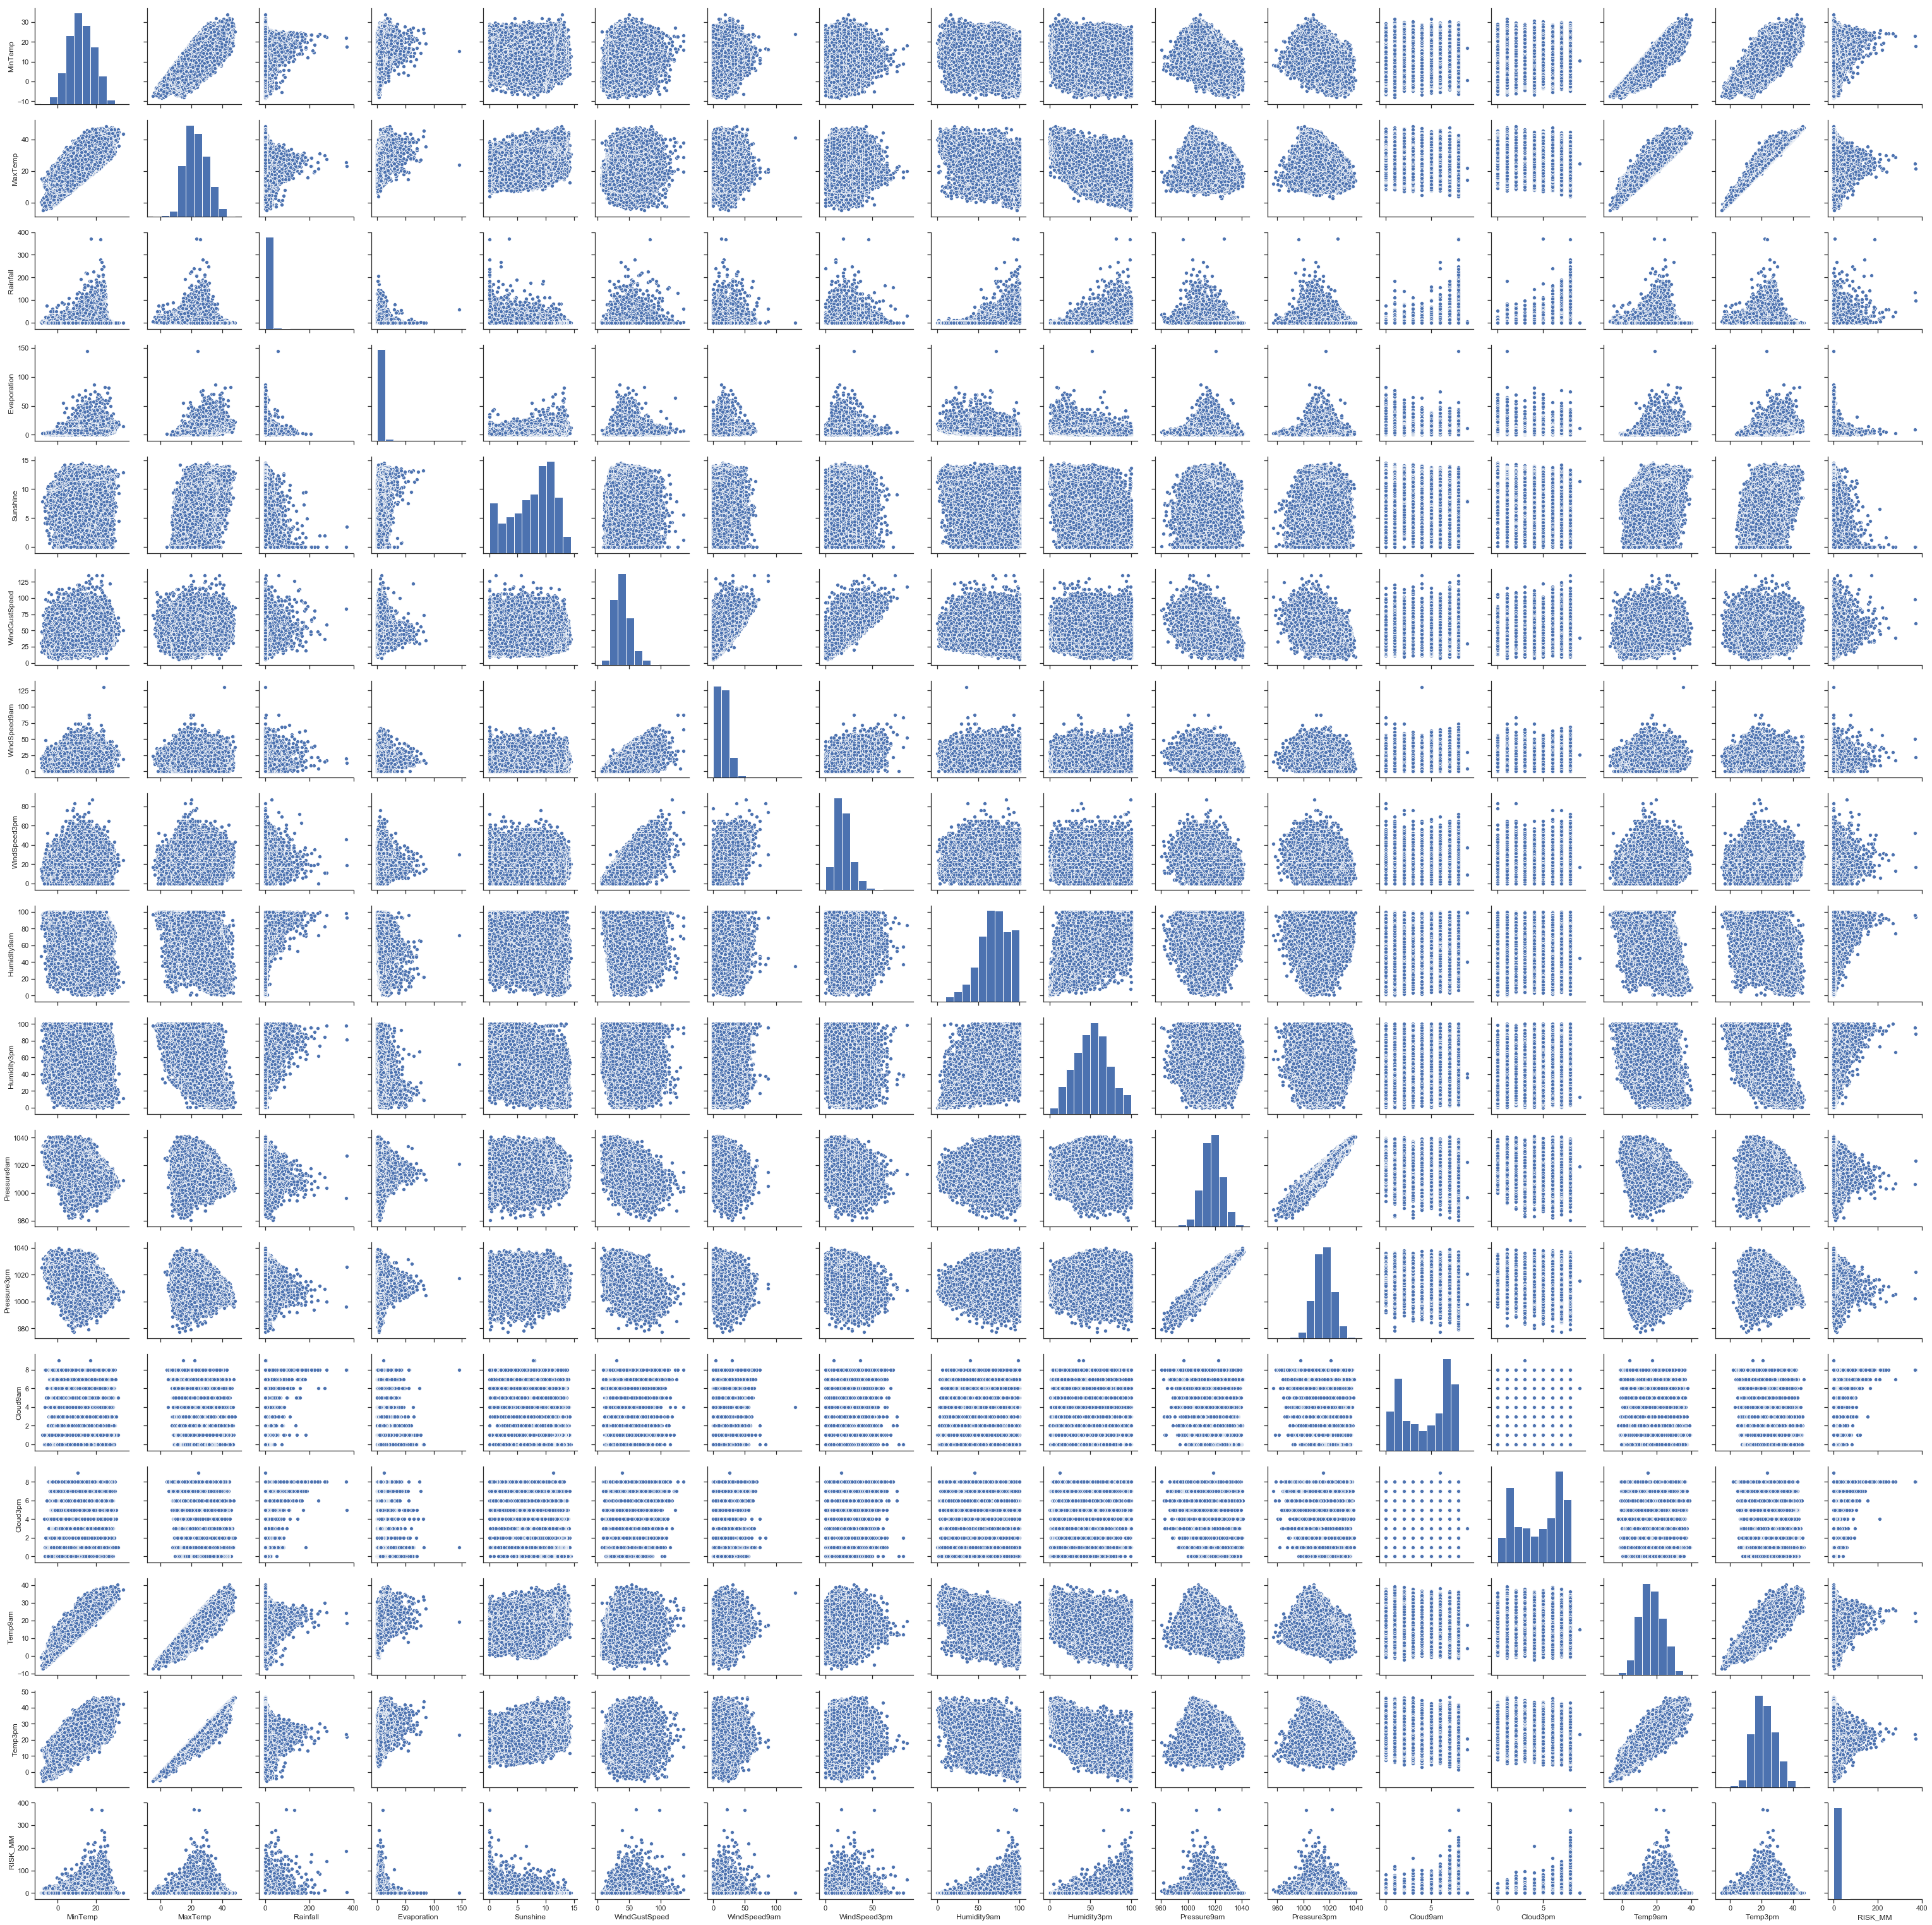

In [20]:
#Pairplot
sns.pairplot(df)